In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from matplotlib import cm
import seaborn as sns

0. Сбор датасета и беглый анализ фичей

In [165]:
data = pd.read_csv('u.data', sep = '\t', header = None) #информация по тому когда какую оценку поставил юзер
user = pd.read_csv('u.user', sep = '|', header = None) #информация о юзере
data.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']

In [166]:
#сами фильмы
item = pd.read_csv('u.item', sep = '|', header = None, encoding='latin-1')
item.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [167]:
data = (pd.merge(data, user)).merge(item)
data.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [168]:
data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie_title', 'release_date',
       'video_release_date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [169]:
data.shape

(100000, 31)

In [170]:
# data['movie title'].value_counts()
# data.columns
# data['user id'].value_counts()

movie_title
Independence Day (ID4) (1996)    429
Air Force One (1997)             431
Toy Story (1995)                 452
Scream (1996)                    478
English Patient, The (1996)      481
Liar Liar (1997)                 485
Return of the Jedi (1983)        507
Fargo (1996)                     508
Contact (1997)                   509
Star Wars (1977)                 583
dtype: int64

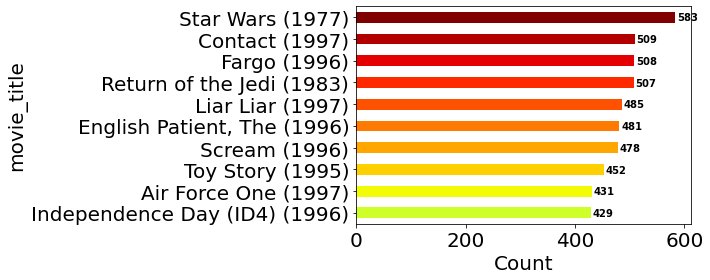

In [171]:
# Самые топ-рейтинг фил
fig1=plt.figure()
top_10_rated = data.groupby('movie_title').size().sort_values()[-10:]
display(top_10_rated)

top_10_rated.plot(kind = 'barh', color = [ cm.jet(x) for x in np.linspace(0.6, 1, 10) ])
for i, v in enumerate(top_10_rated):
    plt.text(v + 3, i-0.15 , str(v), color='black', fontweight='bold')
plt.xlabel('Count')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.show()

Мда, ну тут все фильмы с высокой оценкой - бумерские (< 2000), может быть из-за специфики начала сбора данных. Если посмотреть на возврастное распределение, возможно это подвердится: 

/Users/a.bogoslavskaya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


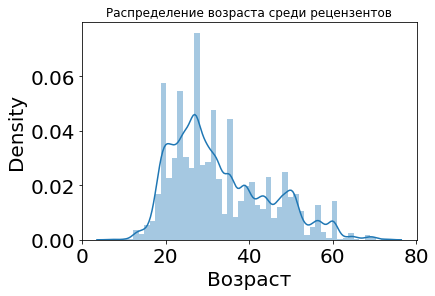

In [193]:
sns.distplot(data.age)
plt.xlabel("Возраст")
plt.title("Распределение возраста среди рецензентов")
plt.show()

In [177]:
data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie_title', 'release_date',
       'video_release_date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [190]:
# num_users = data['user_id'].nunique()
# num_items = data['movie_id'].nunique()
# print("number of unique users:", num_users)
# print("number of unique items:", num_items)

In [175]:
# user_item_matrix = np.zeros((num_users, num_items))
# for row in data.itertuples():
#     user, movie, rating = row.user_id, row.movie_id, row.rating
#     user_item_matrix[user-1, movie-1] = rating

In [178]:
# user_item_matrix = user_item_matrix / np.sum(user_item_matrix, axis=1)[:, np.newaxis]
# user_item_matrix = user_item_matrix.T
# damping_factor = 0.85
# user_item_matrix = damping_factor * user_item_matrix + (1 - damping_factor) / num_items

In [179]:
# num_iterations = 100
# error_threshold = 0.001

In [180]:
# pr_vector = np.ones(num_items) / num_items
# prev_pr_vector = np.zeros(num_items)
# for i in range(num_iterations):
#     prev_pr_vector = pr_vector.copy()
#     pr_vector = user_item_matrix.T.dot(prev_pr_vector)
#     if np.linalg.norm(pr_vector - prev_pr_vector) < error_threshold:
#         break

In [181]:
import networkx as nx

In [184]:
G = nx.Graph()

G.add_nodes_from(data['movie_id'].unique())
for user, movie_group in data.groupby('user_id'):
    movie_group = movie_group['movie_id']
    for movie1, movie2 in zip(movie_group, movie_group.shift(-1).dropna()):
        if not G.has_edge(movie1, movie2):
            G.add_edge(movie1, movie2)

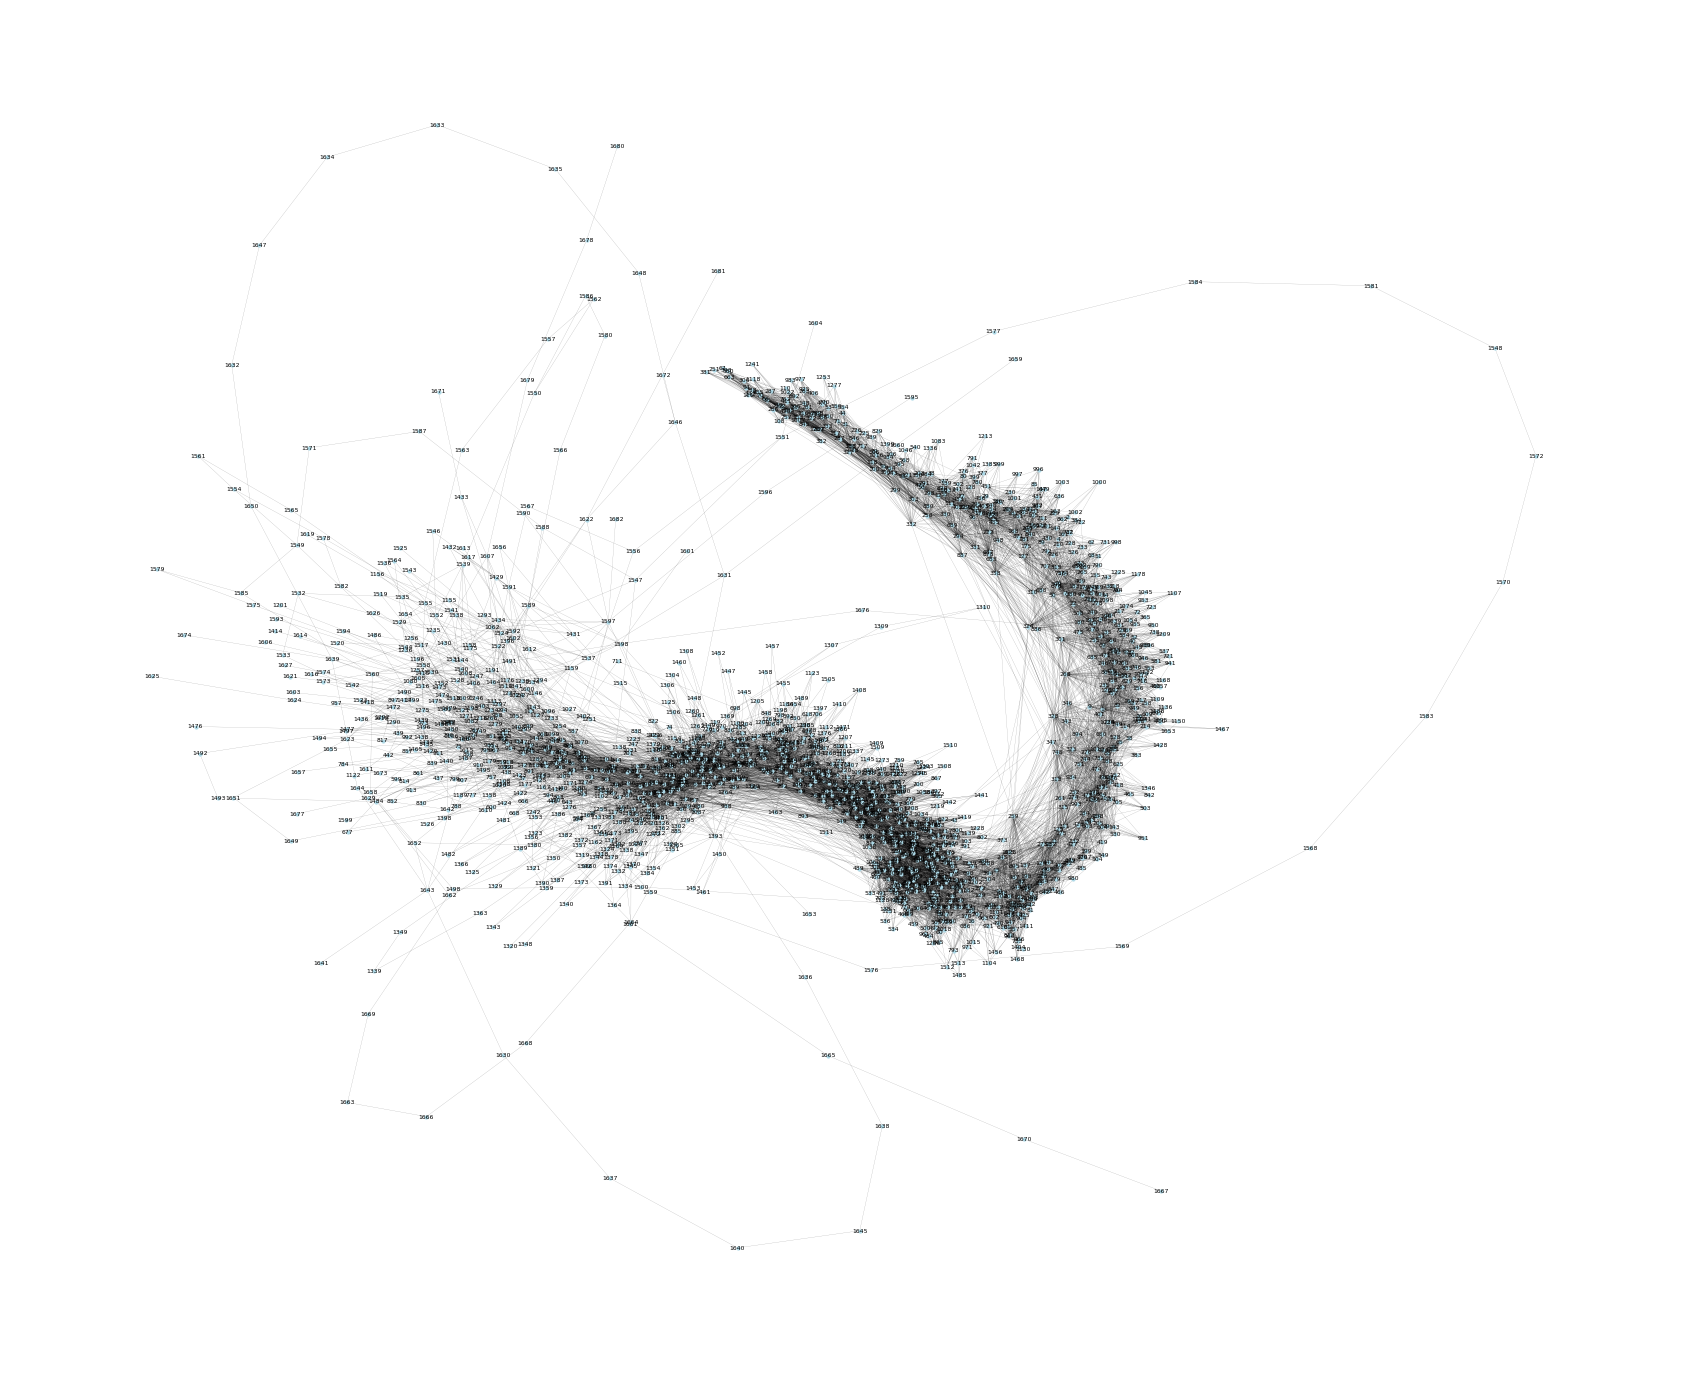

In [194]:
plt.figure(figsize=(30, 25))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')
plt.axis('off')
plt.show()

In [185]:
pagerank_scores = nx.pagerank(G)

In [186]:
pagerank_df = pd.DataFrame(list(pagerank_scores.items()), columns=['movie_id', 'pagerank'])

In [195]:
pagerank_df.head()

,movie_id,pagerank
0,242,0.000427
1,393,0.000405
2,381,0.000361
3,251,0.000317
4,655,0.000532


In [188]:
data_w_pr = data.merge(pagerank_df, on='movie_id', how='left')

In [189]:
data_w_pr.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip code,movie_title,release_date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,pagerank
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0.000427
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0.000427
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0.000427
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0.000427
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0.000427
